# Análisis de Datos - Bitcoin Tweets

En este notebook, continuamos con el análisis del dataset de tweets relacionados con Bitcoin, el cual hemos procesado anteriormente en `data_extractor.py`. El procesamiento incluyó la limpieza de datos, eliminación de URLs, menciones, hashtags y caracteres especiales, así como la normalización de las palabras para facilitar su análisis.

Ahora que el dataset ha sido procesado, nos enfocaremos en el análisis de los datos a través de diversas visualizaciones y gráficos. El objetivo de este análisis es explorar la frecuencia de las palabras clave, identificar tendencias en los datos y obtener insights relevantes sobre cómo se menciona Bitcoin en las redes sociales.

El análisis incluirá:

1. **Generación de Nube de Palabras**: Visualización de las palabras más frecuentes en los tweets.
2. **Estudio de Tendencias**: Identificación de patrones en las menciones de Bitcoin y otros términos relacionados con criptomonedas.
3. **Exploración de Correlaciones**: Posibles relaciones entre las menciones de Bitcoin y su precio, además de otros factores clave presentes en los datos.

A lo largo de este notebook, utilizaremos herramientas de visualización como gráficas y nubes de palabras para facilitar la comprensión de los datos y detectar patrones relevantes.

### Importación de Librerías

In [1]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from wordcloud import WordCloud, STOPWORDS
from data_extractor import DataExtractor

### Preparación de los datos

In [2]:
# Configuramos el estilo de gráficos
sns.set(style='darkgrid')
plt.rcParams['font.family'] = 'Segoe UI Emoji'

In [3]:
# Cargamos procesamos los datos
extractor = DataExtractor('data/Bitcoin_tweets_dataset_2.csv')
df = extractor.process_text()
extractor.save_file('data/dataset_procesado')
print('Dataset procesado correctamente')

Dataset procesado correctamente


In [4]:
# Mostramos las primeras filas del dataframe
display(df.head())

,user_name,text,Hashtags,URLs,Prices,Emoticons,Mentions,text_cleaned
0,ChefSam,Which #bitcoin books should I think about read...,[#bitcoin],[https://t.co/32gas26rKB],[],[],[],Which #bitcoin books should I think about read...
1,Roy⚡️,"@ThankGodForBTC I appreciate the message, but ...",[#Bitcoin],[],[],[],[@ThankGodForBTC],@ThankGodForBTC I appreciate the message but n...
2,Ethereum Yoda,#Ethereum price update: \n\n#ETH $1664.02 USD\...,"[#Ethereum, #ETH, #Bitcoin, #BTC, #altcoin, #c...",[],[1664.02],[],[],#Ethereum price update: #ETH $1664.02 USD #Bit...
3,Viction,CoinDashboard v3.0 is here\nAvailable on ios a...,[#Bitcoin],[https://t.co/tMCQllv9rj],[],[],[],CoinDashboard v3.0 is here Available on ios an...
4,Rosie,#Bitcoin Short Term Fractal (4H)💥\n\nIn lower ...,"[#Bitcoin, #BTC]",[https://t.co/2MG9yL7SDa],[],"[💥, 🫡]",[],#Bitcoin Short Term Fractal 4H💥 In lower timef...


## Análisis mediante Gráficas

### 1. Palabras más frecuentes

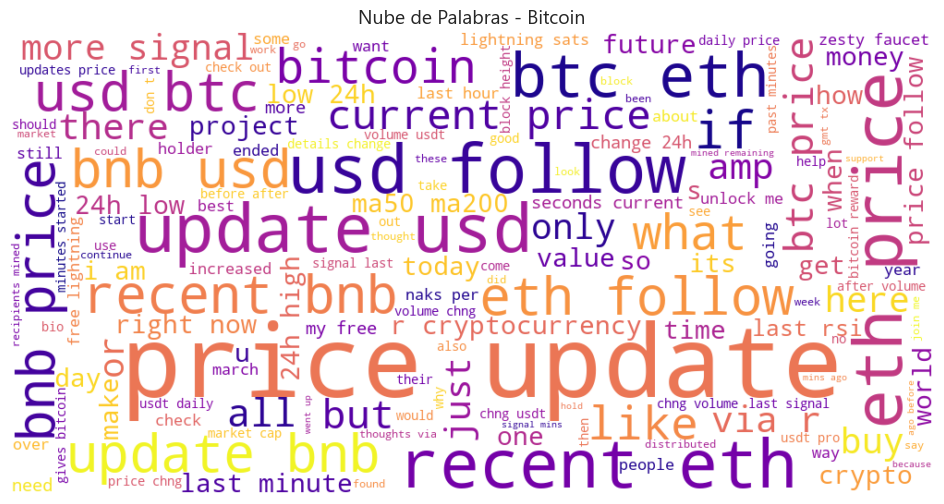

In [5]:
# Creamos la lista de stopwrds (palabras vacías que vamos a omitir en nuestra gráfica)
stopwords = set(STOPWORDS)
stopwords = [
    "which", "on", "the", "to", "in", "of", "and", "for", "is", "it", "that", "with", "this", "at", "from",
    "by", "are", "be", "as", "was", "have", "has", "will", "can", "not", "you", "your", "our", "we", "they",
    "a", "new", "do"
]

# Unimos el texto del dataframe en una sola cadena
text = " ".join(df["text"].dropna())

# Normalización del texto
text = text.lower()  

# Eliminamos URLs, menciones y hashtags para no monopolizar la nube de palabras
text = re.sub(r"http\S+", "", text) 
text = re.sub(r"@\w+", "", text) 
text = re.sub(r"#\w+", "", text) 
text = re.sub(r"[$&+,:;=?@#|'<>.^*()%!-]", "", text)  

# Eliminamos múltiples espacios y espacios extra al principio y final
text = re.sub(r"\s+", " ", text).strip()


# Generamos la nube de palabras 
wordcloud = WordCloud(
    width=1000, height=500, 
    background_color="white", 
    stopwords=stopwords, 
    colormap="plasma", 
    max_words=150, 
    contour_width=2, 
    contour_color='black'
).generate(text)

# Mostramos el gráfico
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.title("Nube de Palabras - Bitcoin", fontsize=14, fontweight='bold')
plt.show()

La nube de palabras generada a partir del análisis de los tweets sobre Bitcoin muestra claramente las palabras más frecuentes en los mensajes. Al observarla, destacamos algunas de las palabras clave como **"price"**, **"update"**, **"usd"**, **"follow"**, **"bitcoin"**, **"eth"** (Ethereum)... etc.

Estas palabras reflejan claramente el enfoque de los usuarios en el precio de Bitcoin y las actualizaciones relacionadas con el mercado. Las menciones de "price" y "update" sugieren que muchos tweets se centran en el seguimiento y la actualización de precios. Además, términos como "usd" y "eth" destacan la conexión con otras criptomonedas y su relación con el precio de Bitcoin.

La palabra **"follow"** también aparece con frecuencia, lo que puede indicar que los usuarios están promoviendo su cuenta o pidiendo a otros que sigan sus actualizaciones sobre el mercado de criptomonedas.

En resumen, la nube de palabras resalta el interés por el precio de Bitcoin y las criptomonedas relacionadas, así como la interacción activa entre los usuarios a través de actualizaciones y seguimiento en redes sociales.


### 2. Emoticonos más usados

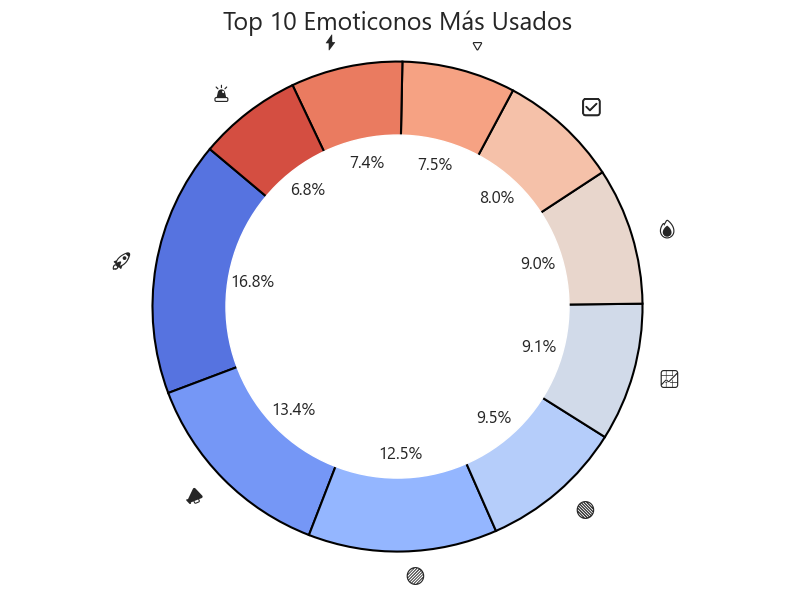

In [6]:
# leemos el dataset procesado
df = pd.read_csv('data/dataset_procesado.csv')

# Converitmos la columna 'Emoticons' a listas de emoticonos
df['Emoticons'] = df['Emoticons'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Filtramos las filas donde 'Emoticons' no sea una lista vacía
non_empty_emoticons = df['Emoticons'].apply(lambda x: x if isinstance(x, list) and len(x) > 0 else None).dropna().explode()

# Contamos la frecuencia de cada emoticono
emoticon_counts = non_empty_emoticons.value_counts().head(10)

# Gráfico de Donut
plt.figure(figsize=(10, 7))

colors = sns.color_palette("coolwarm", n_colors=10)

plt.pie(emoticon_counts.values, labels=emoticon_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}, textprops={'fontsize': 12, 'family': 'Segoe UI Emoji'})
centre_circle = plt.Circle((0,0), 0.70, fc='white')

plt.gca().add_artist(centre_circle)

plt.title('Top 10 Emoticonos Más Usados', fontsize=18, family='Segoe UI Emoji')

plt.axis('equal') 
plt.show()


Gracias a este gráfico de Donut, podemos observar la distribución de los emojis más frecuentemente utilizados en los tweets. Los emojis más destacados son: 🚀, ⚡, 📈, 🔥, ✅, entre otros.

La presencia de estos emojis en los tweets sobre Bitcoin refleja una comunidad activa y emocionalmente involucrada con el ecosistema de las criptomonedas. Los emojis más utilizados transmiten emociones positivas, optimismo y entusiasmo, lo que sugiere que los usuarios tienden a celebrar los logros, compartir análisis técnicos y expresar confianza en el futuro de las criptomonedas.

### 3. Interacciones y menciones entre usuarios

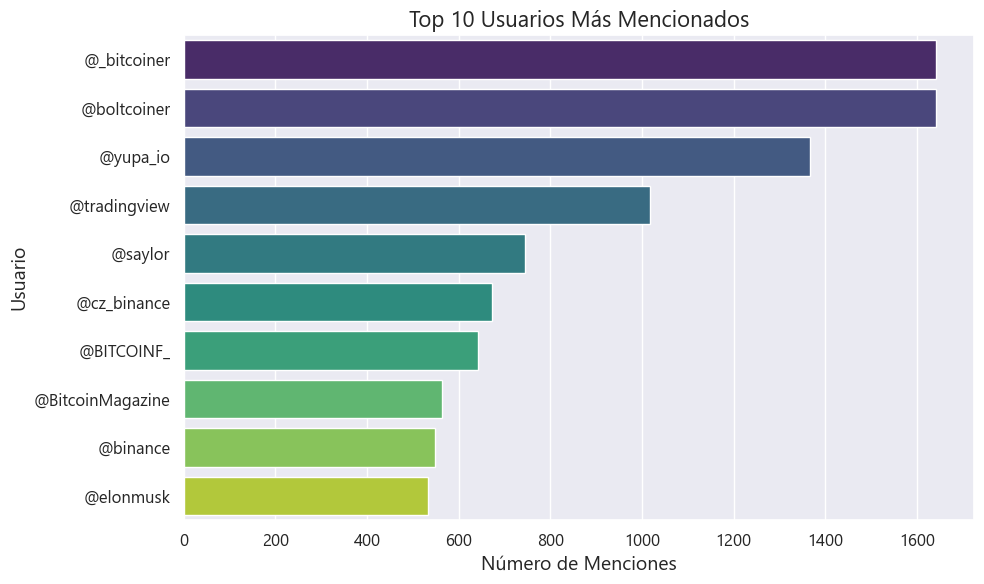

In [7]:
# Leemos el dataset procesado
df = pd.read_csv('data/dataset_procesado.csv')

# Filtramos las menciones de usuarios
df['Mentions'] = df['Mentions'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explotamos la columna de menciones para crear un dataframe con menciones individuales
mentions = df['Mentions'].apply(lambda x: x if isinstance(x, list) else []).explode()

# Contamos la frecuencia de cada usuario mencionado
mention_counts = mentions.value_counts().head(10)

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))

sns.barplot(y=mention_counts.index, x=mention_counts.values, palette='viridis', hue=mention_counts.index, legend=False)

plt.title('Top 10 Usuarios Más Mencionados', fontsize=16, family='Segoe UI Emoji')
plt.xlabel('Número de Menciones', fontsize=14)
plt.ylabel('Usuario', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12, family='Segoe UI Emoji')

# Mostramos la gráfica
plt.tight_layout()  
plt.show()

Al observar las menciones más frecuentes, destaca una fuerte presencia de usuarios relacionados con el mundo de las criptomonedas, como @boltcoiner, @yupa_io, @tradingview, @cz_binance, y @saylor. Estos nombres reflejan un enfoque claro hacia las plataformas de trading y las figuras influyentes en el ecosistema de Bitcoin y otras criptomonedas.

La mención recurrente de plataformas como @binance y @tradingview subraya el interés de los usuarios en herramientas y servicios clave para el análisis y el trading de criptomonedas. Además, el hecho de que varios usuarios que llevan el nombre "Bitcoin" en sus cuentas (como @_bitcoiner y @_bitcoiners) también aparezcan con frecuencia, resalta la comunidad fuertemente orientada hacia esta moneda digital y sus seguidores más comprometidos.

En resumen, la gráfica refleja un ecosistema digital en el que las menciones se concentran principalmente en las principales figuras y plataformas de criptomonedas, lo que pone de manifiesto la relevancia y el impacto de estos actores dentro de la conversación social online sobre criptos.

### 4. Frecuencia de Hashtags

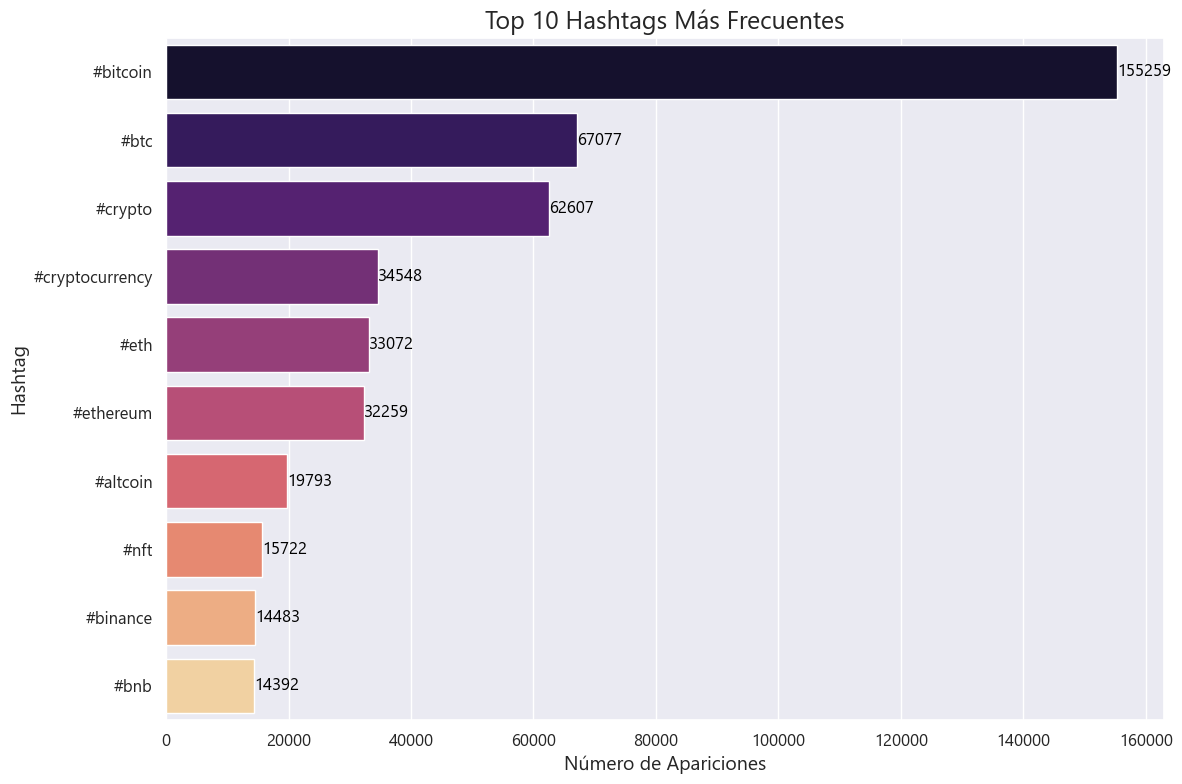

In [8]:
# Leemos el dataset procesado
df = pd.read_csv('data/dataset_procesado.csv')

# Filtramos los hashtags y los convertimos a minúsculas
df['Hashtags'] = df['Hashtags'].apply(lambda x: [tag.lower() for tag in ast.literal_eval(x)] if isinstance(x, str) else [])

# Explotamos la columna de hashtags para crear un dataframe con hashtags individuales
hashtags = df['Hashtags'].apply(lambda x: x if isinstance(x, list) else []).explode()

# Contamos la frecuencia de cada hashtag
hashtag_counts = hashtags.value_counts().head(10)

# Gráfico de barras horizontales
plt.figure(figsize=(12, 8))

sns.barplot(y=hashtag_counts.index, x=hashtag_counts.values, palette='magma', hue=hashtag_counts.index, legend=False)

plt.title('Top 10 Hashtags Más Frecuentes', fontsize=18, family='Segoe UI Emoji', fontweight='bold')
plt.xlabel('Número de Apariciones', fontsize=14)
plt.ylabel('Hashtag', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12, family='Segoe UI Emoji')

for i, v in enumerate(hashtag_counts.values):
    plt.text(v + 3, i, str(v), color='black', fontsize=12, va='center')

# Mostramos la gráfica
plt.tight_layout()  
plt.show()

En este análisis podemos observar que los hashtags más utilizados por los usuarios sigue la misma dinámica de interés en las criptomonedas, nfts y todo lo relacionado. Podemos observar que los más utilizados son #bitcoin #cripto #etherum etc.